## Import Libraries

In [1]:
import sys
import os
!export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:$CONDA_PREFIX/lib/
os.chdir("/home/medha/MEMTrack")
!pwd
sys.path.insert(1, ".")
sys.path.insert(1, "./src/")

/home/medha/MEMTrack


In [2]:
from data_prep_utils import process_data
from data_feature_gen import create_train_data, create_test_data

## Update Data Paths

In [3]:
src = "raw_data/"
folder = "Control_4_only_inf"
final_data_dir = "data/"
out_sub_dir = "collagen"

In [4]:
target_data_sub_dir = os.path.join(final_data_dir, out_sub_dir)
dest_sub_dir = "DataFeatures" # directory to store processed videos
test_video_list = ["video1", "video2"] # list of videos to generate features for, ideally run for video numbers in video_nums
exp_name = "collagen_motility_inference" # name of experiment

## Run Preprocessing Code

In [5]:
video_num = process_data(folder, src, final_data_dir, out_sub_dir)
print("Video Number: ", video_num)

target_data_sub_dir:  data/collagen
video_map_path:  data/videomap.txt
data dirs:  ['data/collagen']
last video num:  0
curr video num:  1
Added to videomap
No Raw Data present, assuming Inference mode only
Annotations processed
Video 1 processed
Video Number:  1


In [6]:
video_list = os.listdir(src)
video_nums=[]

for video in video_list[2:]:
    video_num = process_data(video, src, final_data_dir, out_sub_dir)
    video_nums.append(video_num)

target_data_sub_dir:  data/collagen
video_map_path:  data/videomap.txt
data dirs:  ['data/videomap.txt', 'data/collagen']
last video num:  1
curr video num:  2
Added to videomap
['Nr', 'TID', 'PID', 'x [pixel]', 'y [pixel]', 't [sec]', 'I [val]', 'Len [pixel]', 'D2S [pixel]', 'D2R [pixel]', 'D2P [pixel]', 'v [pixel/sec]', '? [deg]', '?? [deg]', 'E/H']
Annotations processed
['Nr', 'TID', 'PID', 'x [pixel]', 'y [pixel]', 't [sec]', 'I [val]', 'Len [pixel]', 'D2S [pixel]', 'D2R [pixel]', 'D2P [pixel]', 'v [pixel/sec]', '? [deg]', '?? [deg]', 'E/H']
2
3
4
1
[['1', '1', '1', '461.757', '347.733', '0', '196', '0', '0', 'NA', 'NA', 'NA', 'NA', 'NA', 'H'], ['2', '1', '2', '461.757', '347.733', '0', '194', '0', '0', 'NA', '0', 'NA', '0', 'NA', 'H'], ['3', '1', '3', '461.757', '347.733', '0', '191', '0', '0', 'NA', '0', 'NA', '0', '0', 'H'], ['4', '1', '4', '462.784', '347.733', '0', '217', '1.027', '1.027', 'NA', '1.027', 'NA', '0', '0', 'H'], ['5', '1', '5', '462.784', '347.733', '0', '187', '

In [7]:
video_nums

[2]

In [8]:
video_list

['Control_4', 'Control_4_only_inf', 'Control_4.zip']

## Run Feature Generation Code

In [9]:
create_test_data(target_data_sub_dir, dest_sub_dir, exp_name, test_video_list)

video1
data/collagen/video1/frame1video.mp4
150
149
video2
data/collagen/video2/frame1video.mp4
150
149


In [10]:
! ls ./DataFeatures/collagen_motility_inference

data_video1_feature_optical_flow_median_back_2pyr_18win_background_img
data_video2_feature_optical_flow_median_back_2pyr_18win_background_img


## Run Inference code for Object Detection

In [11]:
data_path = os.path.join(dest_sub_dir, exp_name )

#path to saved models
no_motility_model_path="./models/motility/no/collagen_optical_flow_median_bkg_more_data_90k/"
low_motility_model_path="./models/motility/low/collagen_optical_flow_median_bkg_more_data_90k/"
mid_motility_model_path="./models/motility/mid/collagen_optical_flow_median_bkg_more_data_90k/"
high_motility_model_path="./models/motility/high/collagen_optical_flow_median_bkg_more_data_90k/"


#update test video numbers from video map
for video_num in [1,2]:
   #To genearate testing files for all motilities
      !python ./src/inferenceBacteriaRetinanet_Motility_v2.py  --output_dir $low_motility_model_path   --annotations_test "All" --video $video_num   --test_dir $data_path

      !python  ./src/inferenceBacteriaRetinanet_Motility_v2.py  --output_dir $mid_motility_model_path  --annotations_test "Motility-mid" --video $video_num --test_dir $data_path

      !python  ./src/inferenceBacteriaRetinanet_Motility_v2.py  --output_dir $high_motility_model_path --annotations_test "Motility-high" --video $video_num --test_dir $data_path

      !python  ./src/inferenceBacteriaRetinanet_Motility_v2.py  --output_dir $low_motility_model_path  --annotations_test "Motility-low" --video $video_num --test_dir $data_path


Loading config /home/medha/.conda/envs/memtrack2/lib/python3.8/site-packages/detectron2/model_zoo/configs/COCO-Detection/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.
./models/motility/low/collagen_optical_flow_median_bkg_more_data_90k/model_0089999.pth
[09/08 17:21:24 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./models/motility/low/collagen_optical_flow_median_bkg_more_data_90k/model_0089999.pth ...
WARNING [09/08 17:21:24 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[09/08 17:21:24 d2.evaluation.coco_evaluation]: Trying to convert 'boardetect_test' to COCO format ...
[09/08 17:21:24 d2.data.datasets.coco]: Converting annotations of dataset 'boardetect_test' to COCO format ...)
[09/08 17:21:24 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[09/08 17:21:24 d2.data.datase

[09/08 17:21:59 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./models/motility/high/collagen_optical_flow_median_bkg_more_data_90k/model_0089999.pth ...
WARNING [09/08 17:21:59 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[09/08 17:21:59 d2.evaluation.coco_evaluation]: Trying to convert 'boardetect_test' to COCO format ...
[09/08 17:21:59 d2.data.datasets.coco]: Converting annotations of dataset 'boardetect_test' to COCO format ...)
[09/08 17:21:59 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[09/08 17:21:59 d2.data.datasets.coco]: Conversion finished, #images: 149, #annotations: 0
[09/08 17:21:59 d2.data.datasets.coco]: Caching COCO format annotations at './models/motility/high/collagen_optical_flow_median_bkg_more_data_90k/boardetect_test_coco_format.json' ...
[09/08 17:21:59 d2.data.build]: Distribution of instances among all 1 catego

[09/08 17:22:38 d2.data.datasets.coco]: Conversion finished, #images: 149, #annotations: 2086
[09/08 17:22:38 d2.data.datasets.coco]: Caching COCO format annotations at './models/motility/low/collagen_optical_flow_median_bkg_more_data_90k/boardetect_test_coco_format.json' ...
[09/08 17:22:38 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
|    node    | 2086         |
|            |              |
[09/08 17:22:38 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[09/08 17:22:38 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[09/08 17:22:38 d2.data.common]: Serializing 149 elements to byte tensors and concatenating them all ...
[09/08 17:22:38 d2.data.common]: Serialized dataset takes 0.10 MiB
/home/medha/.conda/envs/memtrack2/lib/python3.8/site

[09/08 17:23:05 d2.evaluation.evaluator]: Total inference time: 0:00:05.623725 (0.039054 s / iter per device, on 1 devices)
[09/08 17:23:05 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:05 (0.037310 s / iter per device, on 1 devices)
[09/08 17:23:05 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[09/08 17:23:05 d2.evaluation.coco_evaluation]: Saving results to ./models/motility/mid/collagen_optical_flow_median_bkg_more_data_90k/coco_instances_results.json
[09/08 17:23:05 d2.evaluation.coco_evaluation]: Annotations are not available for evaluation.
OrderedDict()
Loading config /home/medha/.conda/envs/memtrack2/lib/python3.8/site-packages/detectron2/model_zoo/configs/COCO-Detection/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.
./models/motility/high/collagen_optical_flow_median_bkg_more_data_90k/model_0089999.pth
[09/08 17:23:13 d2.checkpoint.detection_checkpoint]: [DetectionChe

[09/08 17:23:40 d2.evaluation.coco_evaluation]: Annotations are not available for evaluation.
OrderedDict()


## Run Tracking code

In [17]:
# Tracking with no GT present
for video_num in  [1]:
     !python ./src/GenerateTrackingData.py --filter_thresh 0.3 --video_num $video_num --data_path $data_path
     !python ./src/Tracking.py --video_num $video_num  --data_path $data_path --max_age 35 --max_interpolation 35
     #plot predictions and gt
     !python ./src/TrackingAnalysis.py --video_num $video_num --data_feature_path $data_path  --data_root_path $final_data_dir --plot
     !python ./src/GenerateVideo.py --video_num $video_num --fps 60 --data_path $data_path


0.3
{'image_id': 0, 'category_id': 0, 'bbox': [448.1765441894531, 332.1556091308594, 30.0701904296875, 30.174102783203125], 'score': 0.9998964071273804, 'diff': 'Motility-high'}
DataFeatures/collagen_motility_inference/data_video1_feature_optical_flow_median_back_2pyr_18win_background_img/test/./video1_predictions.json
DataFeatures/collagen_motility_inference/data_video1_feature_optical_flow_median_back_2pyr_18win_background_img/test//images/
Total tracking data:  1398
----------------------------------------------------------
sample track id list in dict:  [{'image_id': 0, 'category_id': 0, 'bbox': [448, 332, 30, 30], 'score': -1, 'track_label': '1'}, {'image_id': 1, 'category_id': 0, 'bbox': [447, 332, 30, 30], 'score': -1, 'track_label': '1'}]
----------------------------------------------------------
dict track id keys:  dict_keys(['6', '5', '4', '3', '2', '1', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '19', '18', '20', '21', '22'])
----------------------------

In [18]:
# Tracking where GT is present
for video_num in  [2]:
     !python ./src/GenerateTrackingData.py --filter_thresh 0.3 --video_num $video_num --data_path $data_path
     !python ./src/Tracking.py --video_num $video_num  --data_path $data_path --max_age 35 --max_interpolation 35
     #plot predictions and gt
     !python ./src/TrackingAnalysis.py --video_num $video_num --data_feature_path $data_path  --data_root_path $final_data_dir --plot --plot_gt
     !python ./src/GenerateVideo.py --video_num $video_num --fps 60 --data_path $data_path


0.3
{'image_id': 0, 'category_id': 0, 'bbox': [448.1765441894531, 332.1556091308594, 30.0701904296875, 30.174102783203125], 'score': 0.9998964071273804, 'diff': 'Motility-high'}
DataFeatures/collagen_motility_inference/data_video2_feature_optical_flow_median_back_2pyr_18win_background_img/test/./video2_predictions.json
DataFeatures/collagen_motility_inference/data_video2_feature_optical_flow_median_back_2pyr_18win_background_img/test//images/
Total tracking data:  1398
----------------------------------------------------------
sample track id list in dict:  [{'image_id': 0, 'category_id': 0, 'bbox': [448, 332, 30, 30], 'score': -1, 'track_label': '1'}, {'image_id': 1, 'category_id': 0, 'bbox': [447, 332, 30, 30], 'score': -1, 'track_label': '1'}]
----------------------------------------------------------
dict track id keys:  dict_keys(['6', '5', '4', '3', '2', '1', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '19', '18', '20', '21', '22'])
----------------------------

## Vizualize Results

*Download tracked video from:*

`DataFeatures/collagen_motility_inference/data_video<num>_feature_optical_flow_median_back_2pyr_18win_background_img/video<num>-tracklets-filtered-60.mp4`

*Download tracked coordinates from:*

`DataFeatures/collagen_motility_inference/data_video<num>_feature_optical_flow_median_back_2pyr_18win_background_img/test/TrackedRawData_60.csv`

`TrackedRawData_60.csv` contains tracks that have atleast 60 frames tracked and `TrackedRawData_all.csv` conatins all tracks.

`DataFeatures/collagen_motility_inference/data_video<num>_feature_optical_flow_median_back_2pyr_18win_background_img/test/tracklets-filtered` has all the frames with predicted bacteria plotted

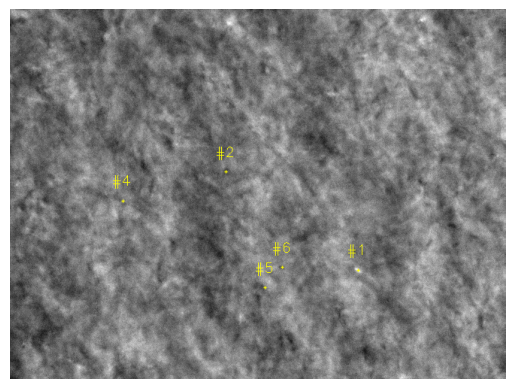

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("DataFeatures/collagen_motility_inference/data_video1_feature_optical_flow_median_back_2pyr_18win_background_img/test/tracklets-filtered/0.png")
plt.imshow(img)
plt.axis('off')
plt.show()

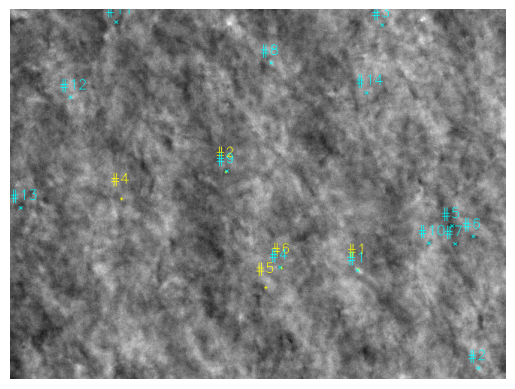

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("DataFeatures/collagen_motility_inference/data_video2_feature_optical_flow_median_back_2pyr_18win_background_img/test/tracklets-filtered/3.png")
plt.imshow(img)
plt.axis('off')
plt.show()

## Evaluation 

Only possible if GT is present

In [27]:
video_map_path="./data/videomap.txt" # path to video map

for video_num in [2]:
     !python src/evaluation_step_wise_motility.py --video_map_path $video_map_path --data_path $data_path --video $video_num --all_labels_file "All"

DataFeatures/collagen_motility_inference
DataFeatures/collagen_motility_inference/data_video2_feature_optical_flow_median_back_2pyr_18win_background_img/test/
Precision Low:  0
Recall Low:  0
Precision mid:  0
Recall mid:  0
Precision high:  0
Recall high:  0
Precision Detection combined:  0.444956241363427
Recall Detection combined:  0.46308724832214765
Precision Filter Box Size:  0.444956241363427
Recall Filter Box Size:  0.46308724832214765
src/evaluation_step_wise_motility.py:111: RuntimeWarning: Mean of empty slice.
  return np.array(mse).mean(), -1, mse
/home/medha/.conda/envs/memtrack2/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
Precision Filter Conf Score:  0.7981220657276995
Recall Filter Conf Score:  0.24448705656759348
Precision Filter NMS:  0.7981220657276995
Recall Filter NMS:  0.24448705656759348
Precision Tracking:  0.6502145922746781
Recall Tracking:  0.435762224

In [22]:
test_video_list

['video1', 'video2']